# **Employee's Turnover Detection Project**

 ## **Case Study**
The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. This is in a bid to reduce the rate of Employees Turnover in the Company. With employees data,the Company's Executives wants answers to the following question: what’s likely to make the employee leave the company?

Our **Goals** in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If we can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.





## **Pace: Plan**
This is the First Stage of our PACE(Plan Analyze Construct & Execute) strategy formula

In this stage, we'll re-study the **Case Study** and try to familiarize ourselves with the Fields present in the Dataset to know have an indepth understanding of how relevant each of them are to the actualisation of the Target.

### Familiarize ourselves with the HR dataset 

`**satisfaction_level**` | Employee-reported job satisfaction level 

`**last_evaluation**`    | Score of employee's last performance review 

`**number_project**`     | Number of projects employee contributes to

`**average_monthly_hours**`  | Average number of hours employee worked per month

`**time_spend_company**` | How long the employee has been with the company (years)

`**Work_accident**`| Whether or not the employee experienced an accident while at work

`**left**`| Whether or not the employee left the company

`**promotion_last_5years**`| Whether or not the employee was promoted in the last 5 years

`**Department**`| The employee's department

`**salary**`| The employee's salary (U.S. dollars)

**Modeling design and target variable**

The data dictionary shows that there is a column calle`left`us. This is a binary value that indicates whethean Employee will leave or noton. This will be the target variable. In other words, for eacEmployeeeo, the model should predict whether thEmployee will leave or stayon.

This is a classification task because the model is predicting a binary class.

## Step 1. Imports

*   Import packages
*   Load dataset

### Import packages

In [13]:
# Import packages


# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

In [14]:

# Load dataset into a dataframe

df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe

df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand our variables
- Clean our dataset (missing data, redundant data, outliers) 

In [15]:
# To get basic information about the data

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [16]:
# To get descriptive statistics about the data

df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename Column Names

As a data cleaning step, we'll rename the Columns as needed by doing the following:
* Standardize the column names so that they are all in `snake_case` 
* correct any column names that are misspelled and
* make column names more concise as needed.

In [17]:
# Display all column names

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [18]:
# Rename columns as needed

df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check for Missing Values 

Here we try to check for missing values in the data

In [19]:
# Check for missing values

df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

Clearly, there are **NO Missing Values** in the Data

### Check Duplicates 

Here we Check for Duplicates in the data using the following code

In [20]:
# Check for duplicates

df0.duplicated().sum()

3008

3008 rows contain Dubplicates. This amounts to 20% of the data. we will want to have an indepth view on the dublicated rows by using the formula below to inspect the first 5 Rows

In [21]:
# Inspect some rows containing duplicates as needed

df0[df0.duplicated()].head()

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  tenure  work_accident  left  \
396                     139       3              0     1   
866                     128       3              0     1   
1317                    127       3              0     1   
1368                    132       3              0     1   
1461                    142       3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

Duplicates Rows entails that different Staff reports  the same Values across all the  Fields. The above output shows the first five occurences of rows that are duplicated farther down in the dataframe. How likely is it that these are legitimate entries? In other words, how plausible is it that two employees self-reported the exact same response for every column?

With several continuous variables across 10 columns, it seems very unlikely that these observations are legitimate. We will proceed by dropping the Duplicates.

In [180]:
# Drop duplicates and save resulting dataframe in a new variable as needed

df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

### Check for Outliers 

We will check for Outliers in the Data using these codes

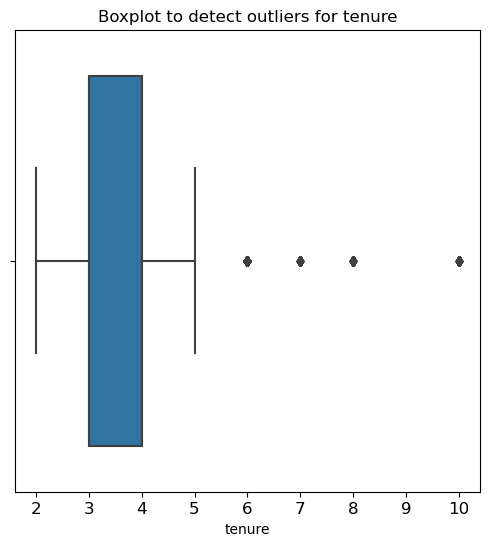

In [181]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

lets check for Outliers for these variables aswell
* tenure
* satisfaction_level and
* number_project

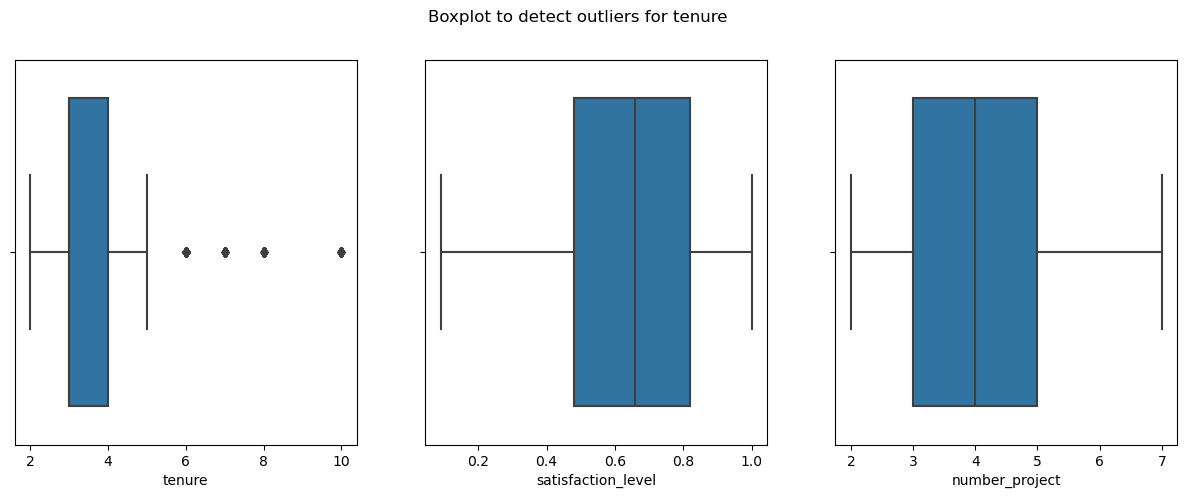

In [24]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
fig, axes = plt.subplots(1,3,figsize=(15,5))
fig.suptitle('Boxplot to detect outliers for tenure')
sns.boxplot(ax = axes[0], x = df1['tenure'])
sns.boxplot(ax = axes[1], x = df1['satisfaction_level'])
sns.boxplot(ax = axes[2], x = df1['number_project'])
plt.show()

The above Visual has shown there are Outliers in the `tenure` Column. we will want to get further informations about this Outlier

we will investigate how many Rows in the data contain outliers in the `tenure` column

In [25]:
# Determine the number of rows containing outliers 


# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove these outliers based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables) 

💭
### We will reflect on these questions as we complete this analyze stage.

- What did we observe about the relationships between variables?
- What did we observe about the distributions in the data?
- What transformations did we make with our data? Why did we chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources did we find ourselves using as we complete this stage? (Make sure to include the links.)
- Did we have any ethical considerations in this stage?

## Step 2. Data Exploration (Continue EDA)

we will begin by understanding how many employees left and what percentage of all employees this figure represents.

In [182]:
# Get numbers of people who left vs. stayed
df1['left'].value_counts(normalize = True)*100

# Get percentages of people who left vs. stayed


left
0    83.39588
1    16.60412
Name: proportion, dtype: float64

### Data visualizations

This is the stage where we examine the varibales that we re interested in by creating visuals to visualize relationships between variables in the data.

we will start by creating a stacked Box Plot showing `average_monthly_hours` distribution for `number_project` comparing the distribution of Employees who Stayed versus who Left. 

We will use Box PLot and Stacked Histogram because Box Plot alone can not the Sample Size.

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


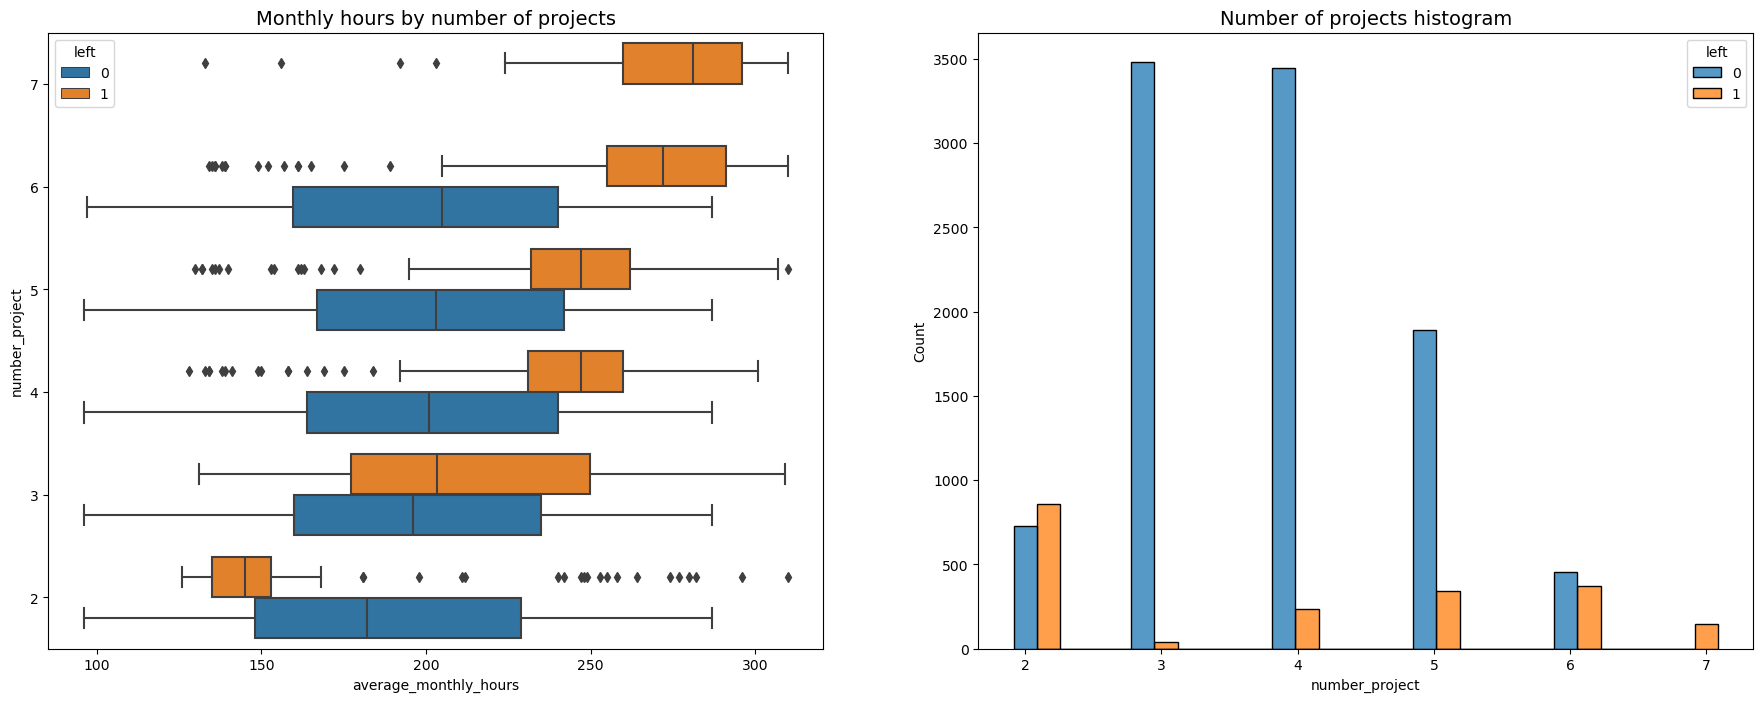

In [183]:
# Create a plot as needed
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `nufmber_project`, comparing employees who stayed versus those who left

sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

1. From the above visualization, it is clear that we have two groups of Employees who left the Company. 
   * Group A: Those who worked considerably less than their peers with the same number of Projects and  
   * Group B:Those who worked more work Hours.
     
   Maybe the once in Group A where already dismissed or where people whose decision to be dismised have already been made and they just wanted     to get to the end of the Month.

2. Every Staff who worked on 7 Number of Projects Left the Company
3. From  the visualization(Box Plot), it can be seen that most Employees whose *iqr* were between 255 - 295 `average _monthly_hours` & their `number project`==7 & 6  Left. No other group has higher. 
5. From  the visualization(Histogram), the Optimal `Number_Project` for Employees should be 3 & 4
6. From  the visualization(Box Plot), it can be seen that most Employees whose *iqr* were between 150 - 235 `average _monthly_hours` & their `number project` were between 1 - 6 Stayed.
7. A 40 hours per week work for 1 year will = 50weeks * 40Hrs/ 12months. this will yield 166.67 hrs/month. from the visualization(Box Plot), we can see that every group bar the Group A(Left) that did 2 Projects surpassed this threshold(166.67 hrs/month). Therefore it is safe to say that the Employees of this very company are been over worked.


In [28]:
len(df1[df1['number_project'] == 7])

145

#### Scatter Plot for Monthly_hours vs Satisfaction_level

Lets consider the relationship between these variables `average _monthly_hours` & `satisfaction_level` using the *scatter plot* visual and we will pay attention to what is happening to the data point were `average _monthly_hours` is == 166.67

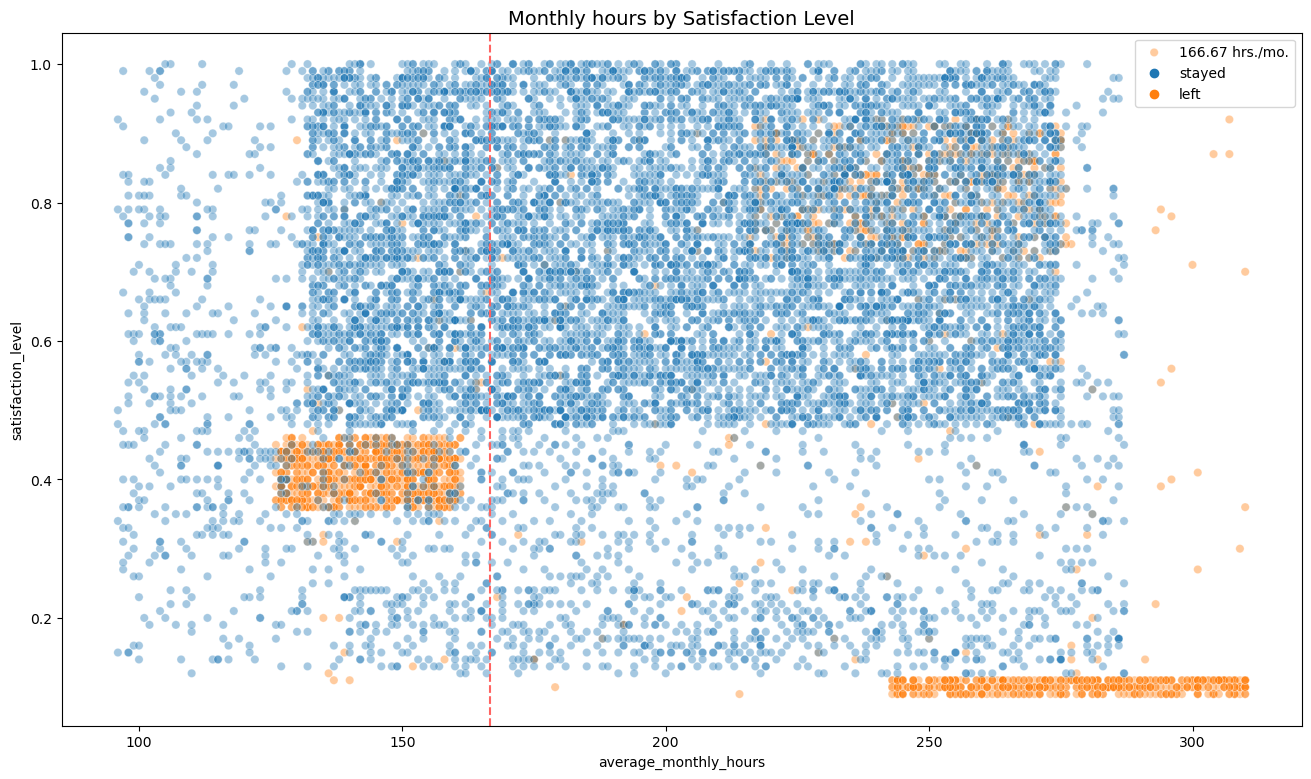

In [29]:
# Create a plot as needed
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361',  ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'stayed', 'left'])
plt.title('Monthly hours by Satisfaction Level', fontsize='14');

from the above visualization, we can make out 4 groups.
1. A group whose `average _monthly_hours` were between (235 - 315)hrs/month they have a `satisfaction_level` of **0** and they all **left**.This is because they work an average of 75 hours every week against the 40 hours per week. There reason maybe that were practically over worked.
2. A group whose `average _monthly_hours` were between (125 - 160)hrs/month they have a `satisfaction_level` of **0.4** and they all **left**. This maybe that they were pressured into working more hours like their colleagues.
3. A group that is most dorminant. There `average _monthly_hours` were between (130 - 225)hrs/month they have a `satisfaction_level` average of **0.75** and they all **stayed**.
4. An unusual group with `average _monthly_hours` between (220 - 275)hrs/month they have a `satisfaction_level` average of **0.83** and they all **left**. it was unusual as their `satisfaction_level`was high and they still **left** probablly as a result of been overworked.

#### Relationship between Tenure vs Satisfaction_level

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


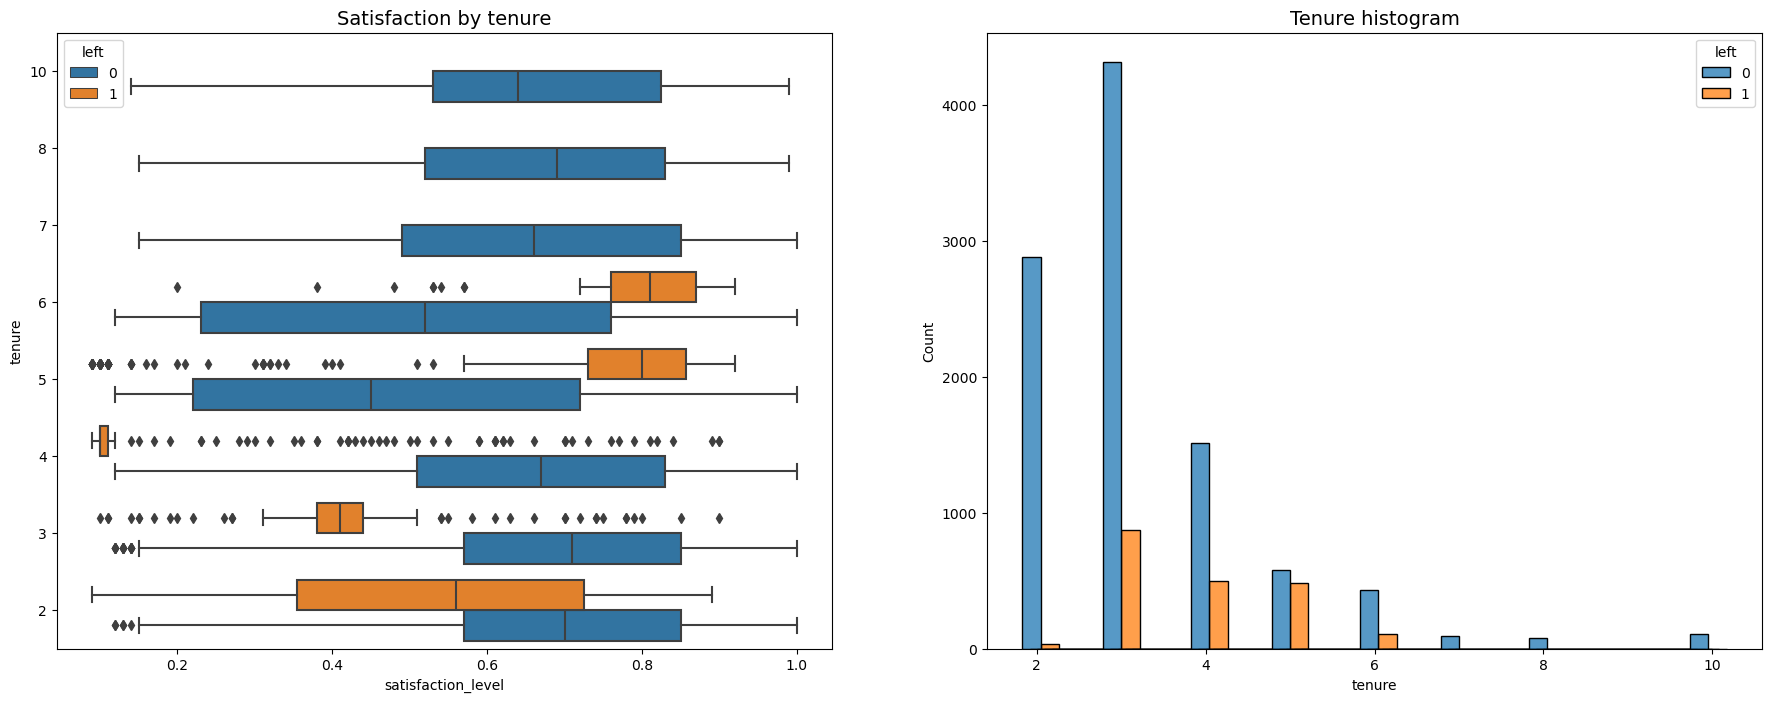

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

#### Observations 
The Box plot visual shows Employees who left fell into Categories: Dissatisfied and Satisfied Employees with medium Tenure lenghts.
4 years Employees who left seem to have a low satisfaction level. it is worthy to investigate further and find out the Company's policy that is driving this low satisfaction level.

Longest serving employees did not leave the company even thogh they have the same satisfaction level with that of new Employees that stayed.

The Histogram visual shows that Employees with Tenures above 6 years are very few compared with other Tenures below 6 years. This may suggest that they are Higher Ranked, Higher Paid Employees.

Employees are most likely to leave between a Tenure value of 3 & 5.


#### To evaluate the number of people who left with their Satisfaction level with respect to mean and median

In [31]:
df1.groupby(['left'],as_index=False).agg({'satisfaction_level':['mean','median']})

left satisfaction_level       
                     mean median
0    0           0.667365   0.69
1    1           0.440271   0.41

The Median is slightly Greater than the Mean(Median > Mean), this shows that the distribution may have skewed to the left. investigating further 

In [32]:
tenure_stayed = df1[df1['left']==0][['satisfaction_level']]

In [33]:
tenure_stayed.head()

satisfaction_level
2000                0.58
2001                0.82
2002                0.45
2003                0.78
2004                0.49

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


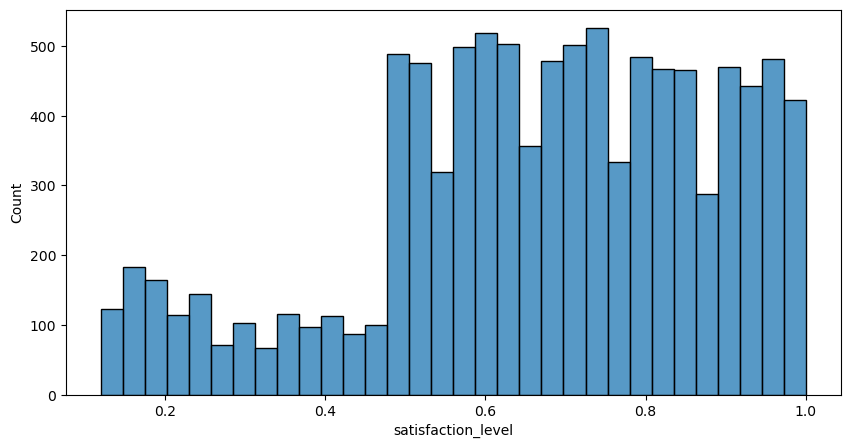

In [34]:
plt.figure(figsize=(10,5))
sns.histplot(data=tenure_stayed, x='satisfaction_level')


# Display the plots

plt.show()

Confirmed, the `satisfaction_level` for the Employees who stayed is slightly skewed to the Left. This shows that majority of the Employees that stayed have a satisfaction_level slightly bigger than 0.667(mean).

#### Salary Level for different Tenures

To be able to visualize the Salary/Tenure relationship to a high granularity level we will categorize the tenure as both `tenure_short` and `tenure_long` 

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


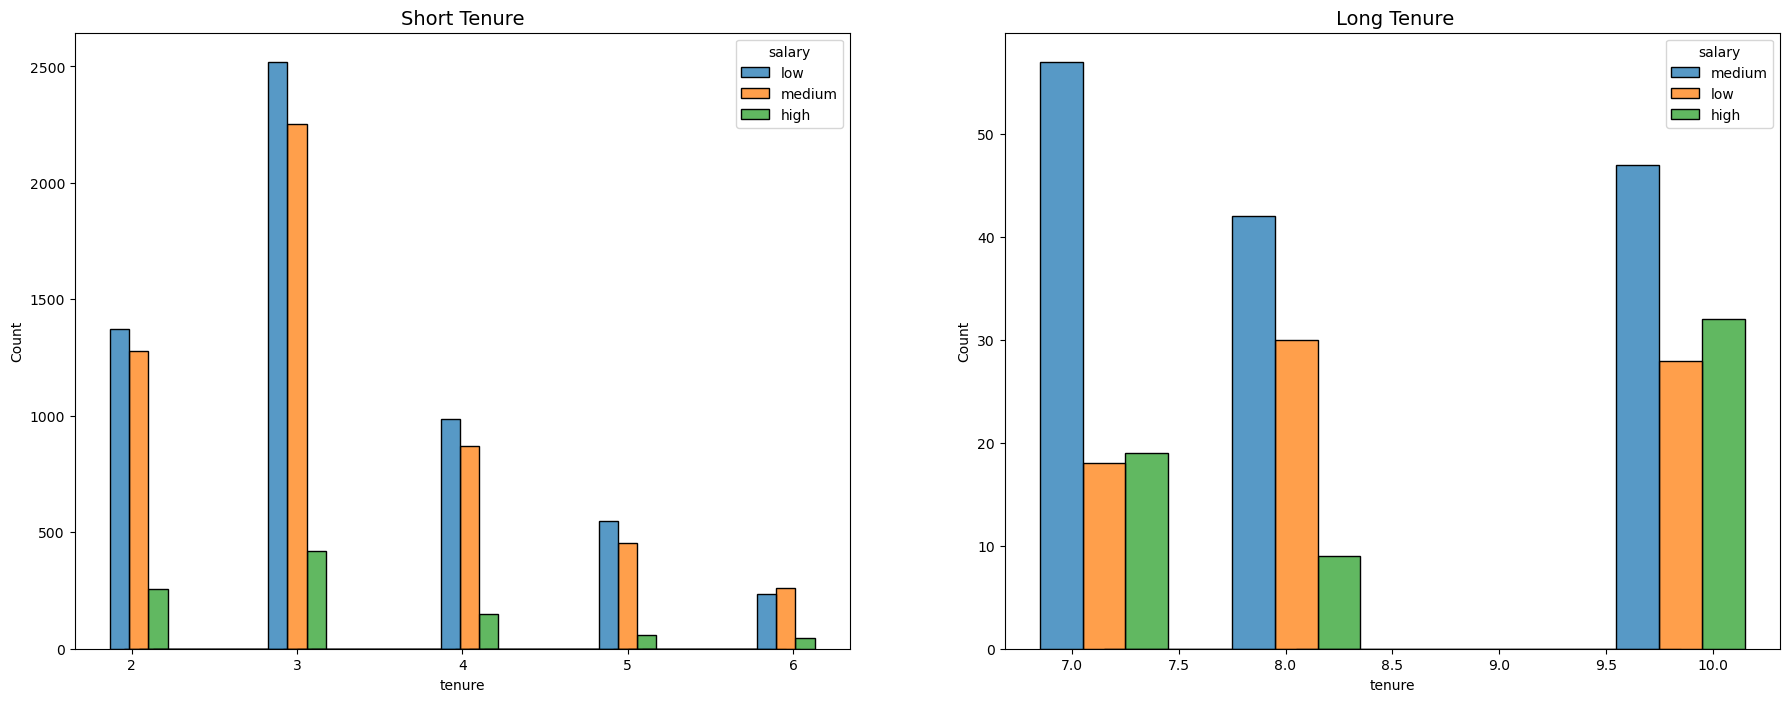

In [35]:
# Create histogram showing distribution of `tenure`, comparing employees for long and short tenures
fig, ax = plt.subplots(1, 2, figsize = (22,8))
tenure_low = df1[df1['tenure'] < 7]
tenure_high = df1[df1['tenure'] > 6]
sns.histplot(data=tenure_low, x='tenure', hue='salary', multiple='dodge', shrink=4, ax=ax[0])
ax[0].set_title('Short Tenure', fontsize='14')


sns.histplot(data=tenure_high, x='tenure', hue='salary', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title(' Long Tenure', fontsize='14')

plt.show();

#### Observations
Unlike what we alledged, the Long tenure Employees are not made up of disproportionately Higher-Payed Employees

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


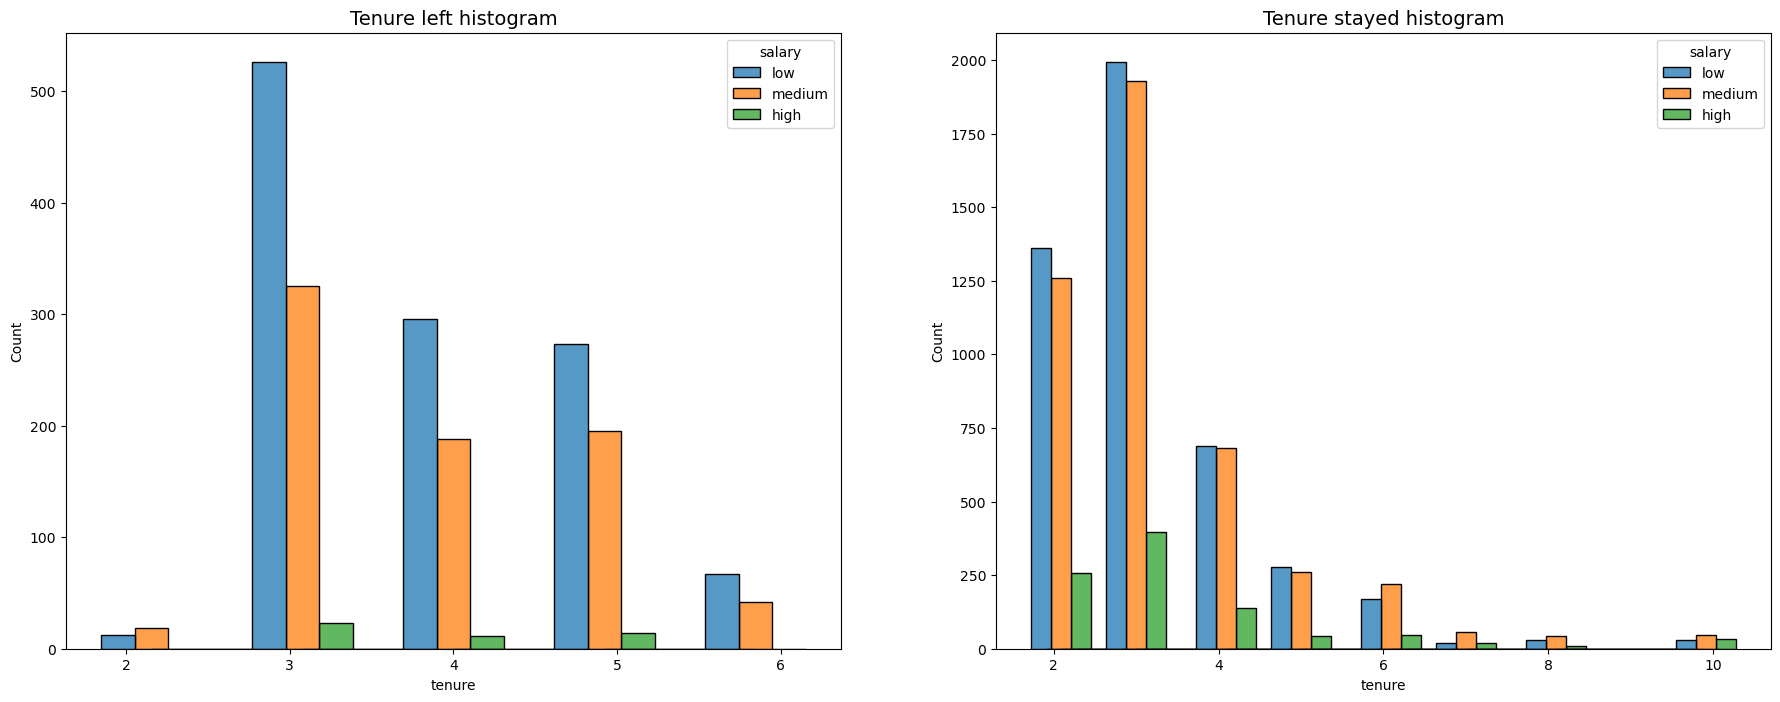

In [36]:
# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
fig, ax = plt.subplots(1, 2, figsize = (22,8))
tenure_left = df1[df1['left']==1]
sns.histplot(data=tenure_left, x='tenure', hue='salary', multiple='dodge', shrink=2, ax=ax[0])
ax[0].set_title('Tenure left histogram', fontsize='14')



# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]

sns.histplot(data=tenure_stay, x='tenure', hue='salary', multiple='dodge', shrink=4, ax=ax[1])
ax[1].set_title('Tenure stayed histogram', fontsize='14')

plt.show();

#### Working Long Hours against High Evaluation
we will check for correraltion between Working Long Hours against High Evaluation

Text(0.5, 1.0, 'Monthly hours by last evaluation score')

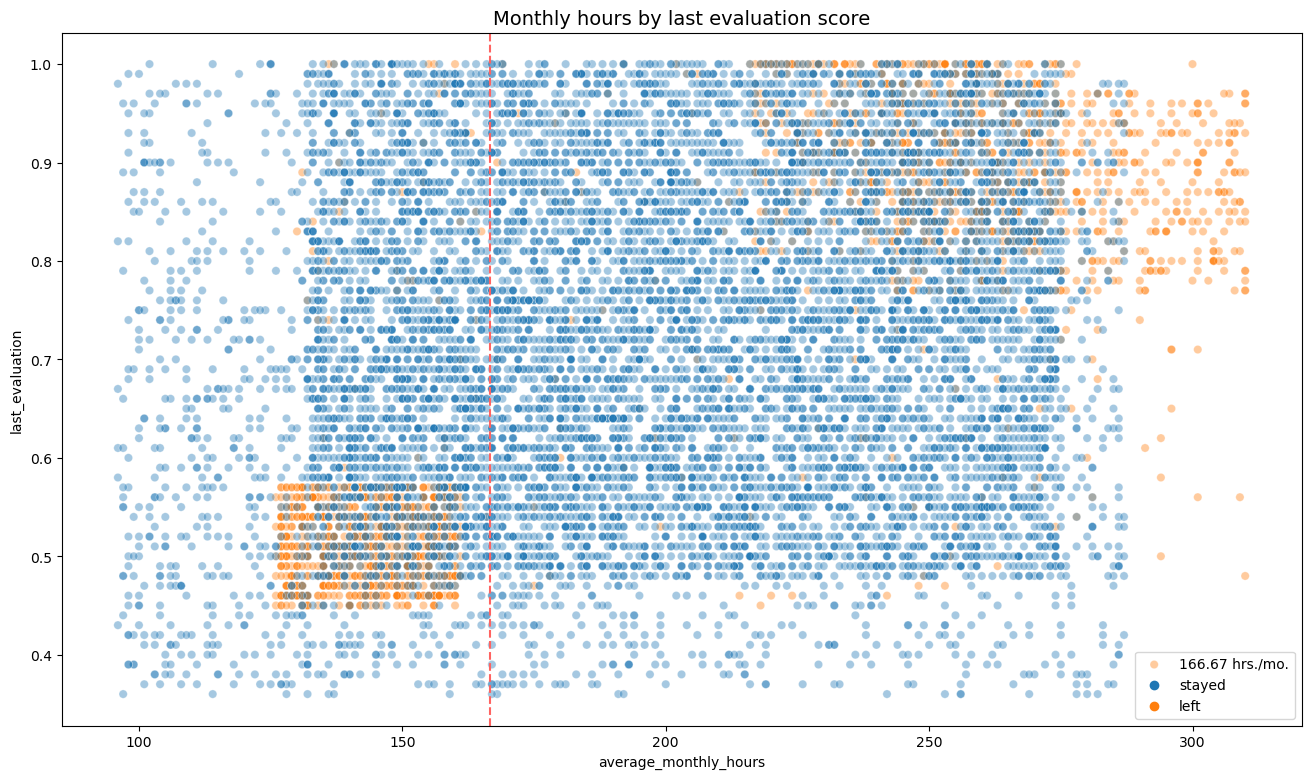

In [37]:
# Create a plot as needed
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361',  ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'stayed', 'left'])
plt.title('Monthly hours by last evaluation score', fontsize='14')

#### Observation
There are 2 types of Employees that left
1. Employees with high `last_evaluation` but with a very high `average_monthly_hours`
2. Employees with last_evaluuation between 0.46 - 0.57 and having worked on an average_monthly_hours lower than 166.67hrs/month

There seems to be a correlation between `average_monthly_hours` and `last_evalutaion`

Working long Hours doesnt neccessarily guarantee good Evaluation Score

Most of the Employees in this company worked well over 166.67hrs/month

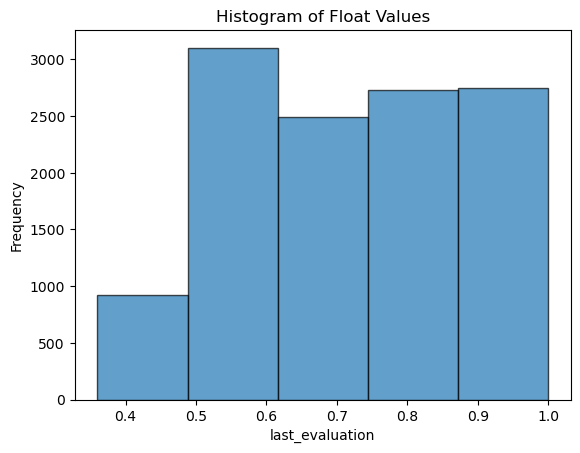

In [171]:
df1['last_evaluation'].plot.hist(bins=5, edgecolor='black', alpha=0.7)
plt.xlabel('last_evaluation')
plt.ylabel('Frequency')
plt.title('Histogram of Float Values')
plt.show()

<Axes: xlabel='left'>

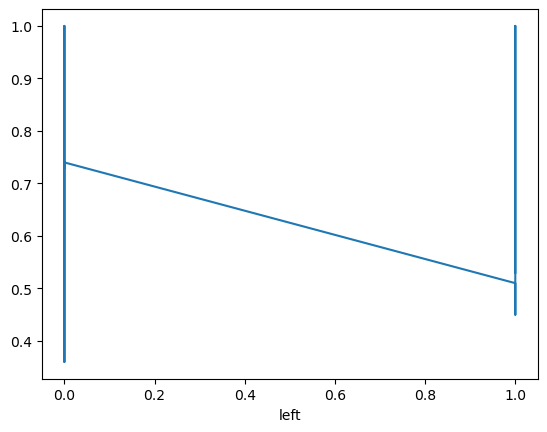

In [167]:
df1.last_evaluation.plot()

#### promotion_last_5years against the Hours average_monthly_hours

We check for the relationship between Promotion and Hours Worked

Text(0.5, 1.0, 'Monthly hours by promotion_last_5years')

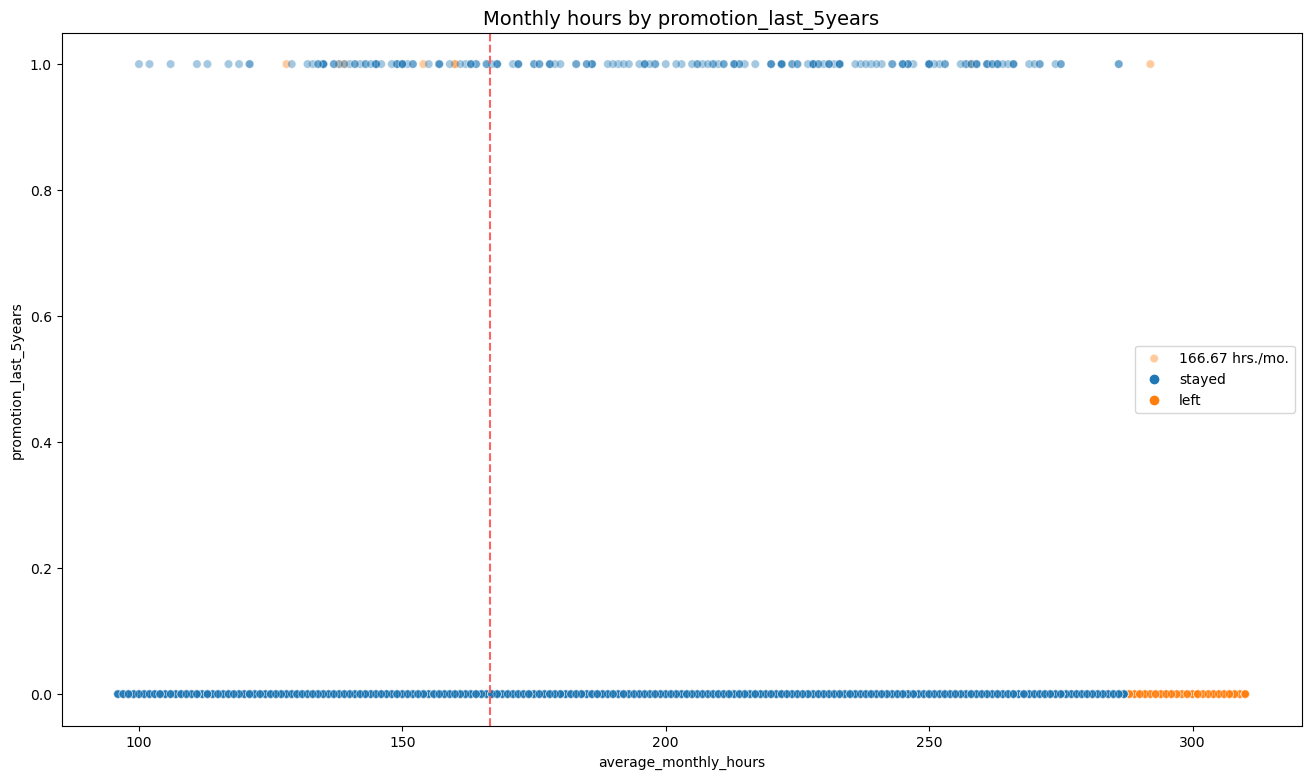

In [160]:
# Create a plot as needed
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361',  ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'stayed', 'left'])
plt.title('Monthly hours by promotion_last_5years', fontsize='14')

In [39]:
df1["promotion_last_5years"].value_counts(normalize = True)*100


promotion_last_5years
0    98.307064
1     1.692936
Name: proportion, dtype: float64

#### Observation
Only 203(1.7%) Employees of the Company were Promoted in the Last 5 Years which is very small.

Very few Employees who worked the most hours were promoted 

Every Employee irrespective of being Promoted in the Last 5 Years whose `average_monthly_hours` where above 280 hrs/month All **Left** 

#### Employees that Left vs Departments

Lets compare Departments against Employees that left

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


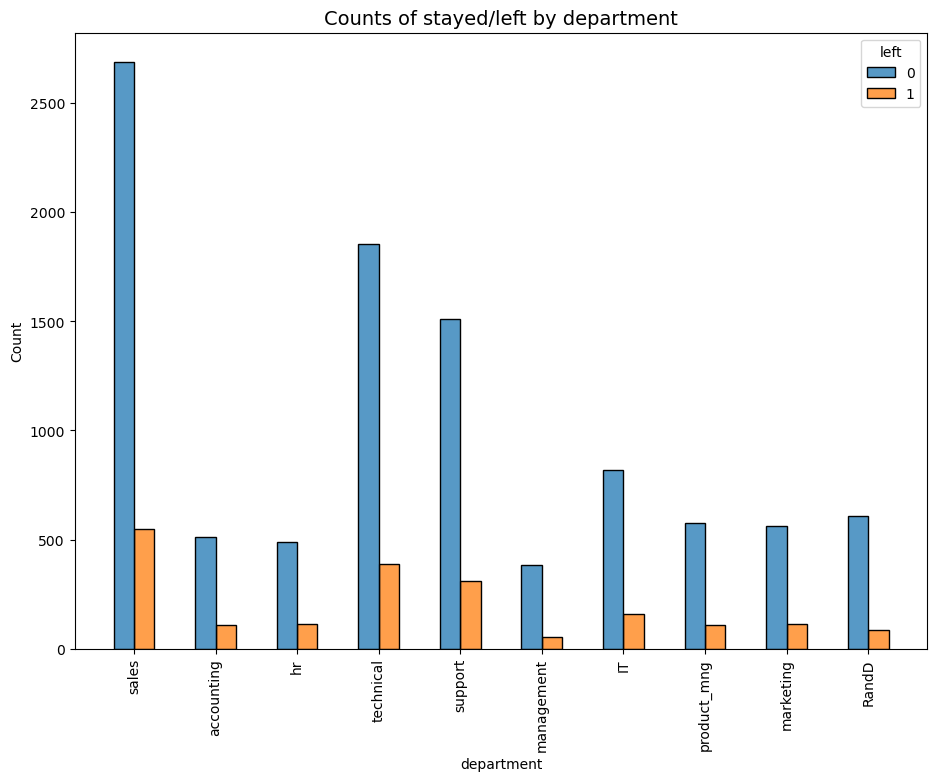

In [40]:
# Create a plot as needed
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='vertical')
plt.title('Counts of stayed/left by department', fontsize=14);

#### Observations 
Every Departments have their fair share of Employees that left

#### Correlation Heatmap Visual
We'll create a Correlation Heatmap from our data. This performs best when the columns are Numeric therefore we will drop non-numeric variables from our data.

In [43]:
# to drop non numeric columns from the data

df2 = df1.drop(['department','salary'], axis =1)
df2.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  
0       3              0     1                      0  
1       6              0     1                      0  
2       4              0     1                      0  
3       5              0     1                      0  
4       3              0     1                      0

In [44]:
# extracting the correlation indices  in the data

corr = df2.corr()
corr

satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.095186       -0.133246   
last_evaluation                  0.095186         1.000000        0.270256   
number_project                  -0.133246         0.270256        1.000000   
average_monthly_hours           -0.006252         0.264678        0.331516   
tenure                          -0.152915         0.096829        0.188837   
work_accident                    0.039940        -0.005695       -0.005612   
left                            -0.350558         0.013520        0.030928   
promotion_last_5years            0.019789        -0.007206       -0.000544   

                       average_monthly_hours    tenure  work_accident  \
satisfaction_level                 -0.006252 -0.152915       0.039940   
last_evaluation                     0.264678  0.096829      -0.005695   
number_project                      0.331516  0.188837      -0.005612   
average_monthly_hours               1.000000  0.102875      -0.012860   
tenure                              0.102875  1.000000       0.000003   
work_accident                      -0.012860  0.000003       1.000000   
left                                0.070409  0.173295      -0.125436   
promotion_last_5years              -0.004964  0.056828       0.029852   

                           left  promotion_last_5years  
satisfaction_level    -0.350558               0.019789  
last_evaluation        0.013520              -0.007206  
number_project         0.030928              -0.000544  
average_monthly_hours  0.070409              -0.004964  
tenure                 0.173295               0.056828  
work_accident         -0.125436               0.029852  
left                   1.000000              -0.044657  
promotion_last_5years -0.044657               1.000000

In [45]:
# ceating its visualization

corr = df2.corr()
corr.style.background_gradient(cmap='RdBu',vmin =-1, vmax =1).format(precision=2)
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

#### Observation
From the Visual, the  **left** Feature has a positive index with the following Variables/Features 
* `last_evaluation`
* `number_project`
* `average_monthly_hours`
* `tenure`

And has a Negative index with these
* `satisfaction_level`
* `work_accident`
* `promotion_last_5years`

We are suprised that the `satisfaction_level` variable has a negative index with `left` variable but this has remained cosnstant with this data.



# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data

## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size


### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Type of Prediction Class:  Binary Classification.
Here we are interested in Predicting Employees who will leave the Company and it is a categotical outcome variable that involves Classification.
This Classification Type is *Binary Classification* 

### Types of models most appropriate for this task: Logistic Regression Model or Tree Based Machine Learning Model.
Because the variable we want to predict is a categorical(whether an Employee will leave or not). we can either build a Logistic Regression Model or a Tree Based Machine Learning Model.

## Modeling Approach A: Logistic Regression Model

### Logistic Regression 
The Binomial Logistic Regression Model suits the Task becase it involves Binomial Classification.

#### Step i: Encode the non-numeric variables in the data
We have 2 Non-Numeric Variales in the data and they are 
`department` and `salary`

`department` is a Categorical Variable therefore we will apply Dummy on it before Modelling.

`salary` is an Ordinal Categorical Variable which means it has a hierarchy. in ths case, we will convert to it Numbers instead of applying Dummy.


To begin our  encoding, we will create a new dataset `df_enc` which will be a copy of `df1` and then we will perform our Encoding into it without actually jeopardising our Main Dataset`df1`

In [137]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False,dtype=int)

# Display the new dataframe
df_enc.head()


satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0              0   
1       6              0     1                      0       1              0   
2       4              0     1                      0       1              0   
3       5              0     1                      0       0              0   
4       3              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

#### Step ii: Check for Correlation between the left variable and the positive index variables using Heatmap.
Lets add `satisfaction_level` because we noticed thier was correlation with outcome variable `left` when combined with `average_monthly_hours`

In [138]:

corr = df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']].corr()
corr.style.background_gradient(cmap='RdBu',vmin =-1, vmax =1).format(precision=2)

# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

#### Step iii: Remove Outliers. 
Logistic Regression Model does not support Outliers, there fore we will reove them. The only variable we had Outliers was in `tenure`.
We will create a New Dataset`df_log_reg` from `df_enc` that will not contain Outliers.

In [139]:
#lets remove outliers
df_log_reg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure']<= upper_limit)]
df_log_reg.head()


satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0              0   
2       4              0     1                      0       1              0   
3       5              0     1                      0       0              0   
4       3              0     1                      0       0              0   
5       3              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0  
5                 1                   0                     0

#### Step iv: Instantiate the Classifier Model
**1. Isolate the Outcome Variable `left`**

In [140]:
y = df_log_reg['left']
y.head()


0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [141]:
# The X consists of Independent Variables without the Outcome Variable
X = df_log_reg.drop(columns='left')

**2. Split the data into Training and Testing set. we will use *stratify = y* because of the imbalance in the Outcome Variable (83.4% vs 16.6%)**

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [143]:
X_train.shape

(8375, 18)

In [144]:
X_test.shape

(2792, 18)

**3. Construct and fit the Logistic Regression Model**

In [145]:
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

**4. We will Test the Logistic Regression Model by making Predictions on the Test data**

In [146]:
y_pred = log_clf.predict(X_test)

#### step v: Evaluate The Model
**1. Create a Confussion Matrix to vissualize the results of the Logistic Regression Model**

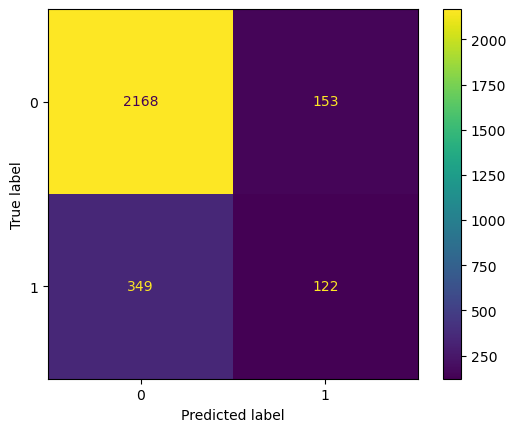

In [147]:
log_cm = confusion_matrix(y_test,y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm, display_labels= log_clf.classes_)

# Plot Cconfusion_matrix 
log_disp.plot(values_format='')
# Display plot
plt.show()



The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave = **2168**

False positives: The number of people who did not leave the model inaccurately predicted as leaving = **153**

False negatives: The number of people who left that the model inaccurately predicted did not leave = **349**

True positives: The number of people who left the model accurately predicted as leaving = **122**

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

2. Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model

In [148]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



#### Observation
From the above outcome, the Logistic Regression Moodel achieved the following 
* precission of 79%
* recall of 82%
* f1-score of 80%
* accuracy of 82%

But in situations where it is important to avoid False Negative, the Model did not do well. As it scored a False Negative = 348

## Modeling Approach A: Tree Based Model
This approach covers the Decision Tree and Random Forest

1. Isolate the outcome variable.


    We are not going to remove Outliers as Tree Based Models are not strict on Outliers. 

    We will use our dataset `df_enc`

In [58]:
# Isolate the outcome variable
y = df_enc['left']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [59]:
# Select the features
X = df_enc.drop('left', axis=1)

# Display the first few rows of `X`
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0              0   
1       6              0                      0       1              0   
2       4              0                      0       1              0   
3       5              0                      0       0              0   
4       3              0                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

2. Split the data into Training and Testing set. we will use *stratify = y* because of the imbalance in the Outcome Variable (83.4% vs 16.6%)

In [60]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [61]:
print('total rows of X_train: ',X_train.shape[0], '\n' ,'total rows of X_test: ', X_test.shape[0])

total rows of X_train:  8993 
 total rows of X_test:  2998


#### Decision tree - Round 1

Construct a decision tree model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [62]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')


Fit the decision tree model to the training data.

In [63]:
%%time
tree1.fit(X_train, y_train)

CPU times: total: 4.66 s
Wall time: 5.03 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'recall', 'accuracy', 'f1', 'roc_auc', 'precision'})


Identify the optimal values for the decision tree parameters.

In [64]:
# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}


Identify the best AUC score achieved by the decision tree model on the training set.

In [65]:
# Check best AUC score on CV
tree1.best_score_

0.969819392792457

This is a strong AUC score, which shows that this model can predict employees who will leave very well.


Write a function that will help us extract all the scores from the grid search.

In [66]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table


Use the function just defined to get all the scores from grid search.

In [67]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819

All of these scores from the decision tree model are strong indicators of good model performance.

Recall that decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions. You could construct a random forest model next.

#### Random forest - Round 1

Construct a random forest model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [82]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the random forest model to the training data

In [89]:
%%time
rf1.fit(X_train, y_train) # --> Wall time: ~10min

CPU times: total: 25min 54s
Wall time: 25min 55s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'recall', 'accuracy', 'f1', 'roc_auc', 'precision'})

#### Lets create where we will like to save our Model

In [83]:
path = 'Desktop/jovyan'

In [84]:
def write_pickle(path, model_object, save_as : str):
    with open(path + save_as + '.pickle','wb') as to_write:
        pickle.dump(model_object, to_write)

In [85]:
def read_pickle(path, saved_model_name : str):
    '''
    in: 
        path: path to the folder where we want to read from
    saved_model_name: filename of pickled model we want to read in
    
    out:
        model: the Pickled model
    '''
    with open(path + saved_model_name + '.pickle','rb') as to_read:
        model = pickle.load(to_read)
       



In [86]:
write_pickle(path, rf1, 'hr_rf1')

In [87]:
read_pickle(path,  'hr_rf1')

In [90]:
# we'll identify the optimal values for the parameters of the random forest model
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [91]:
# to identify the best score for AUC achieved by the model rf1

rf1.best_score_

0.9804250949807172

In [92]:
# we will use the make_result function we created, to evaluate other metrics that corresponds with our best_score metrics 

rf1_cv_results = make_results('random forest1 cv', rf1, 'auc')
rf1_cv_results

model  precision    recall        F1  accuracy       auc
0  random forest1 cv   0.950023  0.915614  0.932467  0.977983  0.980425

In [95]:
# model_results.drop(model_results.index, inplace=True)

In [94]:
#recall our tree1 results are
print(tree1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819


In [96]:
# combining the two models into a new dataframe(model_result) we have 

model_results = pd.concat([rf1_cv_results,tree1_cv_results])
model_results

model  precision    recall        F1  accuracy       auc
0  random forest1 cv   0.950023  0.915614  0.932467  0.977983  0.980425
0   decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819

#### Observation
The **random forest1 cv** performed better than the **decision tree cv** model

#### Evaluation with the Test data
we will create a function `get_scores` that will get all the scores by testing our champion model prediction with the test data `y_test` 

In [97]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [98]:
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

model  precision    recall        f1  accuracy       AUC
0  random forest1 test   0.964211  0.919679  0.941418  0.980987  0.956439

#### Observation
The **random forest1 cv** performed well with the test data which is good. This appears to be a strong model. Since this test set was only used for this model, we can be more confident that our model's performance on this data is representative of how it will perform on new, unseeen data.

#### Lets create a Pair Plot and view further insights

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

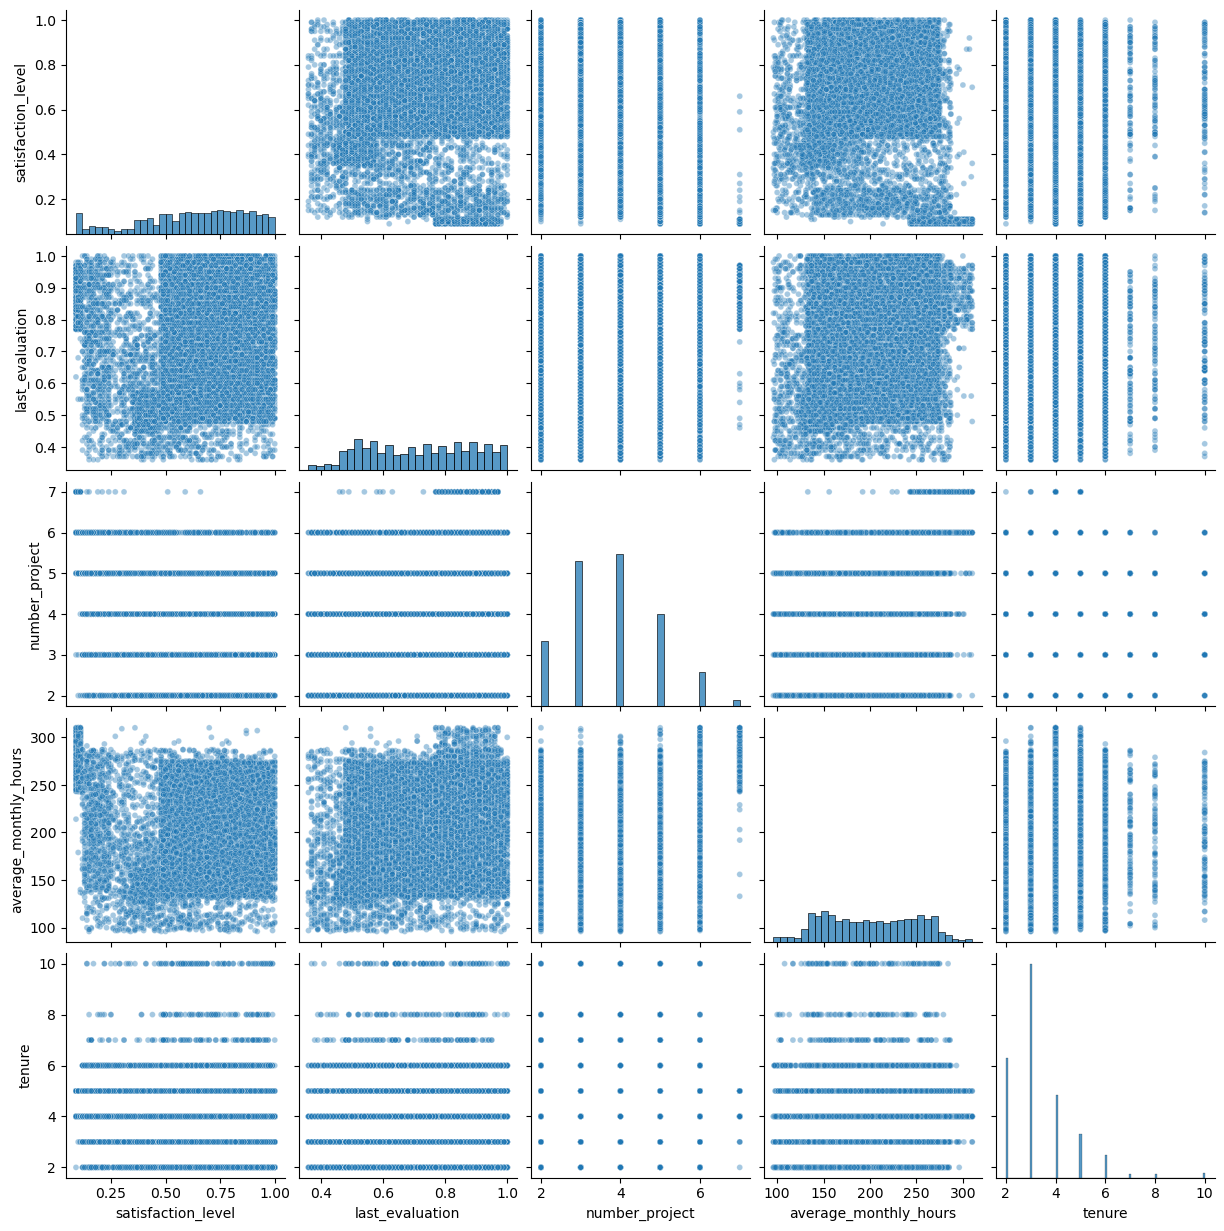

In [298]:
sns.pairplot(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']], plot_kws={'alpha':0.4,'size':5})


### Feature Engineering 

You might be skeptical of the high evaluation scores. There is a chance that there is some data leakage occurring. Data leakage is when you use data to train your model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the `average_monthly_hours` column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours.

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models.

From the above visual, we can observe some level of multi colinearity between `satisfaction_level`and `average_monthly_hours`therefore we could proceed by dropping `satisfaction_level` and creating a new feature that roughly captures whether an employee is overworked. You could call this new feature `overworked`. It will be a binary variable.

In [152]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_enc.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df2.head()

last_evaluation  number_project  average_monthly_hours  tenure  \
0             0.53               2                    157       3   
1             0.86               5                    262       6   
2             0.88               7                    272       4   
3             0.87               5                    223       5   
4             0.52               2                    159       3   

   work_accident  left  promotion_last_5years  salary  department_IT  \
0              0     1                      0       0              0   
1              0     1                      0       1              0   
2              0     1                      0       1              0   
3              0     1                      0       0              0   
4              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

In [153]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day. 

You could define being overworked as working more than 175 hours per month on average.

To make the `overworked` column binary, you could reassign the column using a boolean mask.
- `df3['overworked'] > 175` creates a series of booleans, consisting of `True` for every value > 175 and `False` for every values ≤ 175
- `.astype(int)` converts all `True` to `1` and all `False` to `0` 

In [154]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int32

Having gotten this new column, we will drop the `average_monthly_hours`

In [155]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df2.head()

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
1             0.86               5       6              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0              0                 0   
1                      0       1              0                 0   
2                      0       1              0                 0   
3                      0       0              0                 0   
4                      0       0              0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   

   department_support  department_technical  overworked  
0                   0                     0           0  
1                   0                     0           1  
2                   0                     0           1  
3                   0                     0           1  
4                   0                     0           0

#### Instantiate a new model to capture this modifications 
Again, isolate the features and target variables

In [156]:
# Isolate the outcome variable
y = df2['left']

# Select the features
X = df2.drop('left', axis=1)

In [157]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Decision tree - Round 2

In [105]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

#### fit the model

In [106]:
%%time
tree2.fit(X_train, y_train)

CPU times: total: 4.16 s
Wall time: 4.15 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'recall', 'accuracy', 'f1', 'roc_auc', 'precision'})

In [107]:
# Check best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [108]:
# Check best AUC score on CV
tree2.best_score_

0.9586752505340426

#### Observation
This model performs very well, even without satisfaction levels and detailed hours worked data.

#### lets use our make_result function to get other corresponding matrics 

In [109]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')

In [110]:
model_results = pd.concat([model_results,tree2_cv_results])
model_results

model  precision    recall        F1  accuracy       auc
0  random forest1 cv   0.950023  0.915614  0.932467  0.977983  0.980425
0   decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675

#### Observation
There was a reduction in performance whiich is expected considering the reduction in Features `satisfaction_level` and `average_monthly_hours`.
The scores are very good non the less

#### Random forest - Round 2

In [111]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [112]:
%%time
rf2.fit(X_train, y_train) # --> Wall time: 7min 5s

CPU times: total: 20min 33s
Wall time: 20min 35s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'recall', 'accuracy', 'f1', 'roc_auc', 'precision'})

##### Pickle 
we will use our pickle helper function to write and read pickle

In [350]:
write_pickle(path, rf2, 'hr_rf2')

In [351]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

(8993,)

##### check for best Params and Best Scores

In [113]:
# Check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [114]:
#Check best AUC score on CV
rf2.best_score_ 

0.9648100662833985

We'll use our helper function(make_results) to get all the other corressponding CV scores 

In [115]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')

# Join the results with the existing result dataframe
model_results = pd.concat([model_results,rf2_cv_results])

#sort by descending order to easily locate champion model
model_results = model_results.sort_values(by='auc',ascending=False)

#reset index
model_results.reset_index(drop=True, inplace=True)
model_results

model  precision    recall        F1  accuracy       auc
0  random forest1 cv   0.950023  0.915614  0.932467  0.977983  0.980425
1   decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
2  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.964810
3  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675

#### Observation 
Again, the scores dropped slightly, but the random forest performs better than the decision tree if using AUC as the deciding metric. 
**Champion Model**: *random forest2 cv*

Score the champion model on the test set(X_test, y_test), we'll use the helper function(get_score)

In [116]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

model  precision    recall      f1  accuracy       AUC
0  random forest2 test   0.870406  0.903614  0.8867  0.961641  0.938407

#### Observation
This seems to be a stable, well-performing final model.

##### Next
Plot a confusion matrix to visualize how well it predicts on the test set.

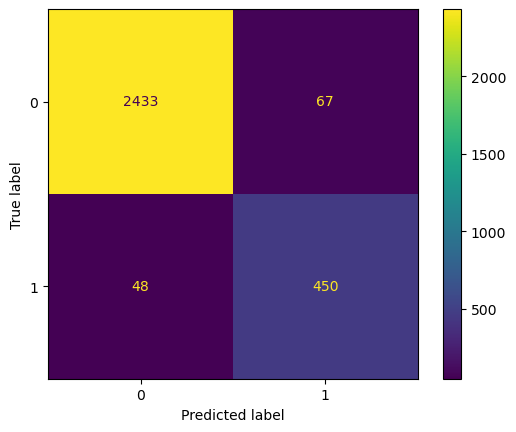

In [117]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf2.classes_)
disp.plot(values_format='');

#### Observation
The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. By the context of this Project, we'll prefer having more False Positives than False Negatives.
Therefore this is a strong model.

### Decision tree splits

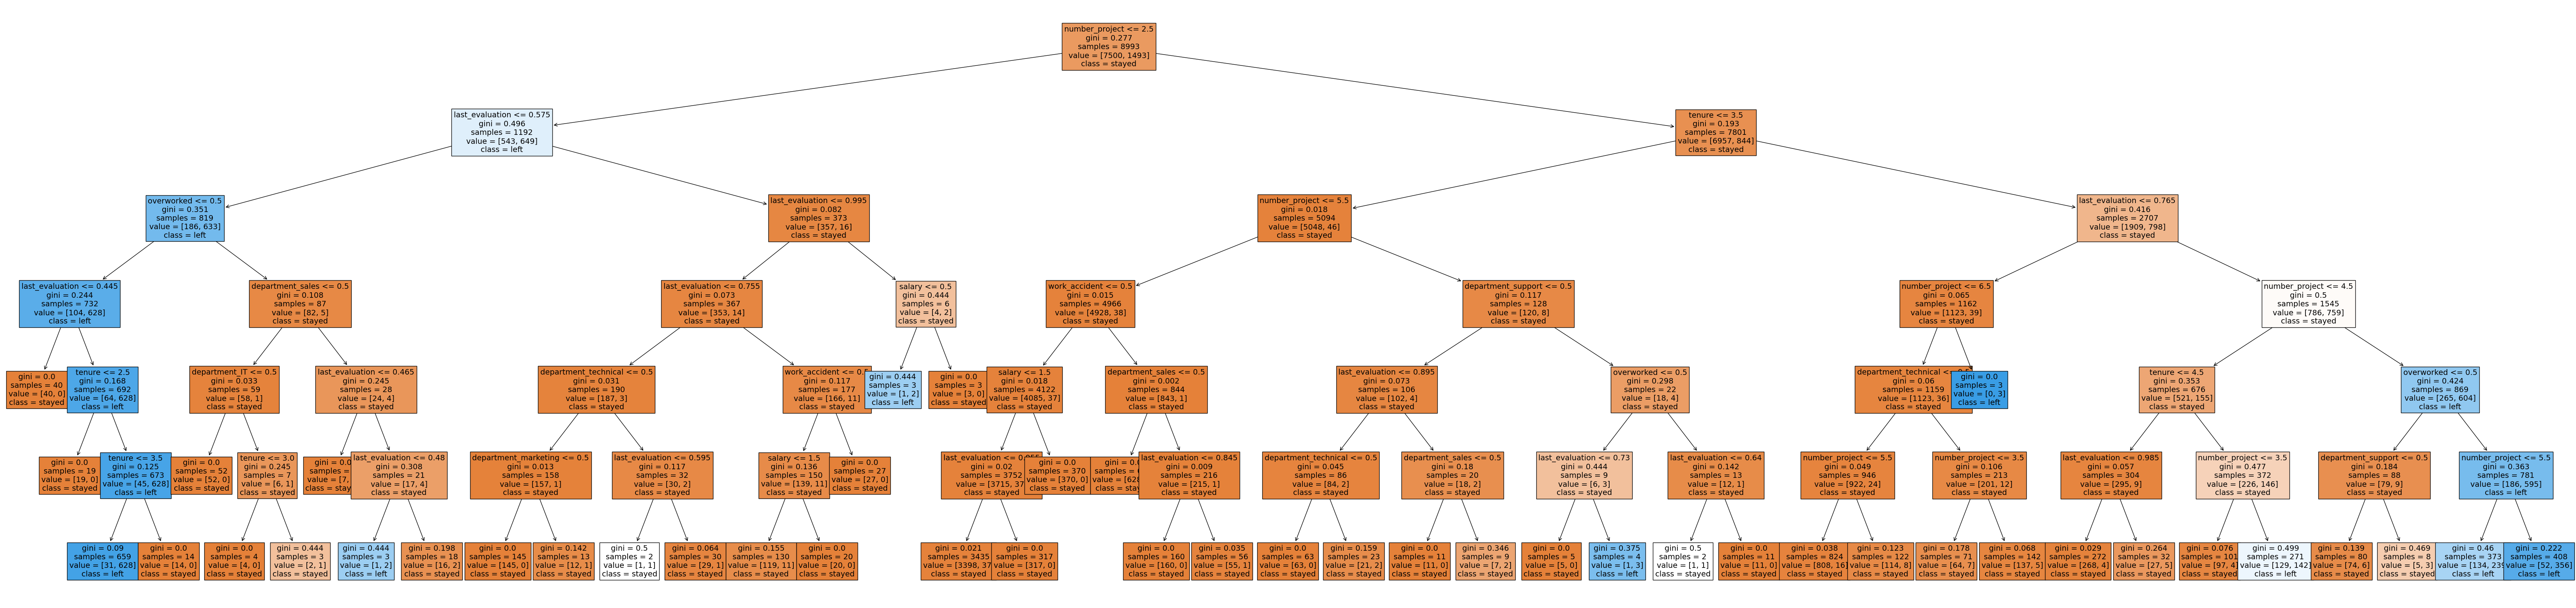

In [118]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

#### Decision tree feature importance
we can also get feature importance from decision trees (see the [DecisionTreeClassifier scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_) for details).

In [119]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

gini_importance
last_evaluation              0.343958
number_project               0.343385
tenure                       0.215681
overworked                   0.093498
department_support           0.001142
salary                       0.000910
department_sales             0.000607
department_technical         0.000418
work_accident                0.000183
department_IT                0.000139
department_marketing         0.000078

we will now create a Bar Plot to visualize the decision *Tree Features Importance*

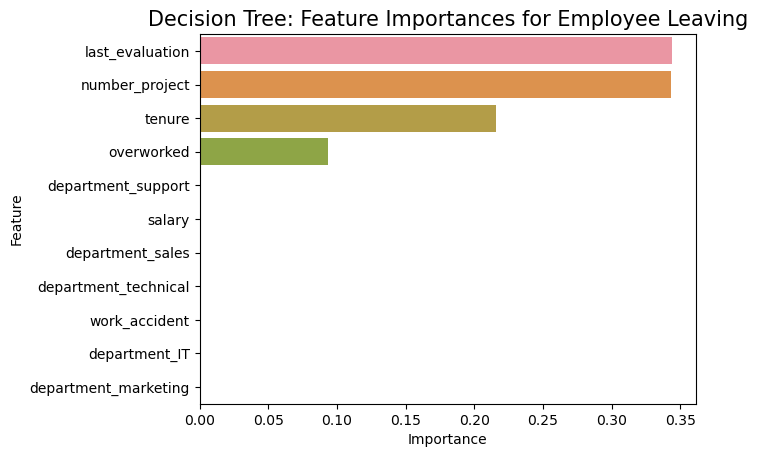

In [120]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=15)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

#### Observation
The barplot above shows that in this decision tree model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`.

### Random forest feature importance

Now, plot the feature importances for the random forest model.

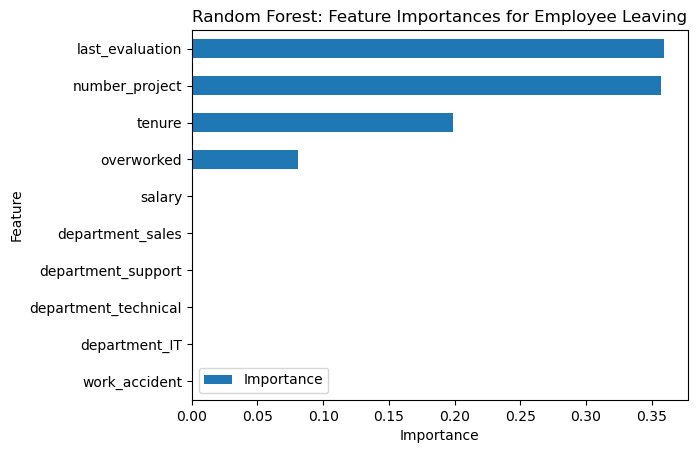

In [121]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

#### Observation
The plot above shows that in this random forest model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`, and they are the same as the ones used by the decision tree model.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders

## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.

💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?


We were able t build 5 models 

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders

### Summary of model results

We built 5 models in the purpose of this Project which are illustrated as follows

### Logistic Regression Model. 

#### Metric Result

In [150]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



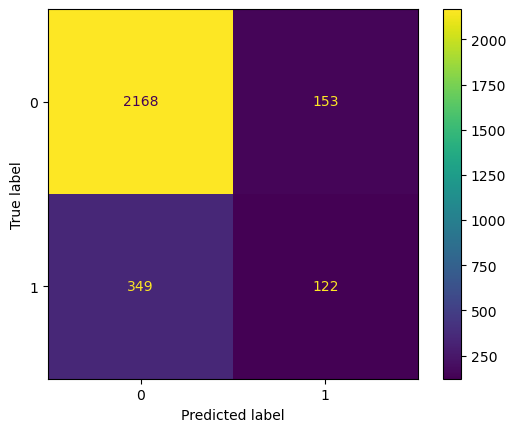

In [134]:

log_disp.plot(values_format='')
# Display plot
plt.show()

#### Observation
From the above outcome, the Logistic Regression Moodel achieved the following 
* precission of 79%
* recall of 82%
* f1-score of 80%
* accuracy of 82%

It has a high score of **False Negative: 348** this implies that it predicted **Falsely** a substantial number of Employee that will not **leave** the Company that actually **left**.The Goal of this Model is to Predict the Emplotees that will leave so as to device measures of getting them to reconsider so as to reduces Cost/Resources of Hiring new Employees and re-training them. Therefore, performing optimally as regards False Negative is key.

We will then look at other Models


### Table Based Model 
* decision tree model
* random forest model

we combined the evalution metrics of these two models and from their choose our Champion Model.

In [149]:
model_results

model  precision    recall        F1  accuracy       auc
0  random forest1 cv   0.950023  0.915614  0.932467  0.977983  0.980425
1   decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
2  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.964810
3  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675

After thorough considertaions, we elected random forest2 as our Champion Model and we tested it with our Test data and the performance was thus

In [126]:
rf2_cv_results

model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481

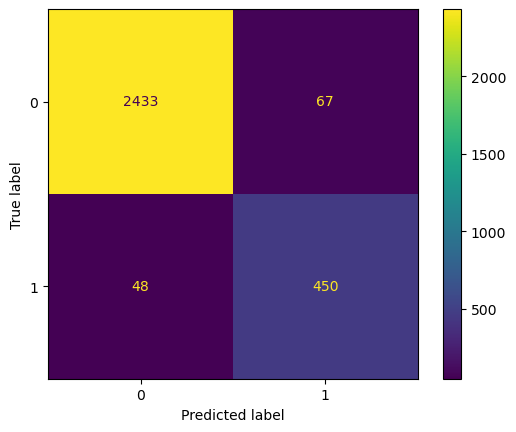

In [158]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf2.classes_)
disp.plot(values_format='');

#### Observation
The **Random forest2** model has an all round better performance than the Logistic Regression Model. 
it predicts more **false positives** than **false negatives**, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case and by the context of this Project, we'll prefer having more False Positives than False Negatives. Therefore this is a strong model.


We will then look at other Models

## Conclusion, Recommendations, Next Steps

### Summary
The following Features contributes to Employees turnover in their Descending order of Importance.
* `last_evaluation`
* `number_project`
* `tenure`, and
* `overworked`

These variables are most helpful in predicting the outcome variable, `left`.


### Recomendation.
#### The Last Evaluation

From Analysis it is confirmed that high Last Evaluation Score is directly proportional to Employees staying.

The last evaluation exercise for employees is a critical process that can significantly impact their growth, job satisfaction, and overall performance. Here are some reasons why it should be taken seriously. 


1. **Individual Development**:
   
Employee evaluations provide an opportunity for personal growth. Constructive feedback helps employees understand their strengths and areas for improvement. Taking it seriously allows them to enhance their skills and competencies.

2. **Motivation and Engagement**:

When employees perceive that their evaluations are taken seriously, they feel valued and motivated. Recognition of their efforts encourages higher engagement and commitment to their work.

3. **Performance Improvement**

Evaluations highlight performance gaps. By addressing these gaps, employees can improve their effectiveness. Taking the exercise seriously ensures that necessary adjustments are made.

4. **Regular Check-Ins**

Regularly check in with employees throughout the year, not just during formal evaluations. This helps build rapport and ensures that feedback isn’t a surprise.

5. **360-Degree Feedback**

Gather feedback from peers, subordinates, and supervisors. A holistic view provides a more accurate assessment.

6. **Goal Setting and Development Plans**

Collaborate with employees to set meaningful goals. Create personalized development plans based on their aspirations and areas for improvement.

7. **Recognition and Appreciation**

Celebrate achievements and recognize hard work. A positive evaluation experience motivates employees to excel

8. **Feedback Culture**

Foster a culture where feedback is continuous and constructive. Encourage open dialogue between employees and managers.
Remember, investing effort in employee evaluations benefits both individuals and the organization as a whole. It’s an opportunity for growth and alignment
.*

#### Number of Project

Every Staff who worked on 7 Number of Projects Left the Company 
From  the visualization(Histogram), the Optimal `Number_Project` for Employees should be 3 & 4

The Company should look in to the situation and ensure that Employees should not be involved in more than 5 projects and should this occur, they should ensure these category of Employees(invoved in more than 5 projects) are specially taken care of with keen interest.

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


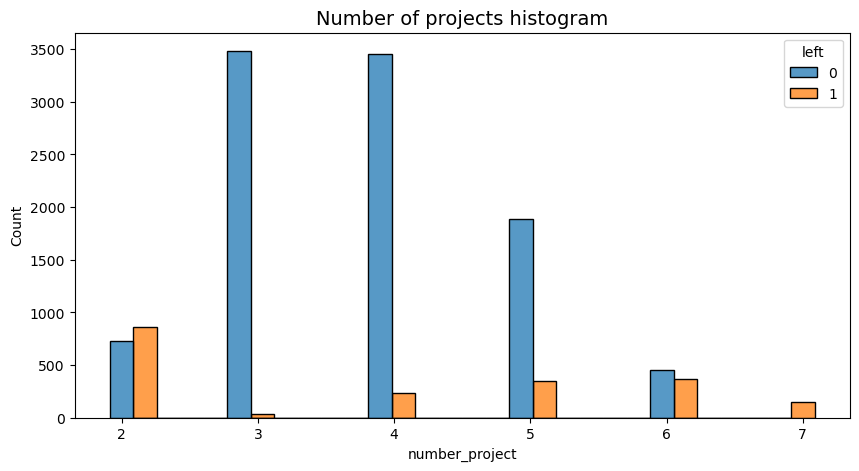

In [195]:
plt.figure(figsize = (10,5))
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2).set_title('Number of projects histogram', fontsize='14')

plt.show();

#### Tenure

Employees that stay more than 6 years in the company are few compared to number of Employees.

Employees are most likely to leave between a Tenure value of 3 & 5.
The company should increase efforts to increase the retention rate of these category of Employees through these steps
1. Offer Competitive Compensation
2. Remote Work Flexibility
3. Flexible Scheduling
4. Work-Life Balance
5. Recognition and Rewards
6. Positive Company Culture
7. Employee Engagement
8. Teamwork Emphasis
9. Combat Employee Burnout
10. Wellness Offerings and 
11. Additional Perks


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


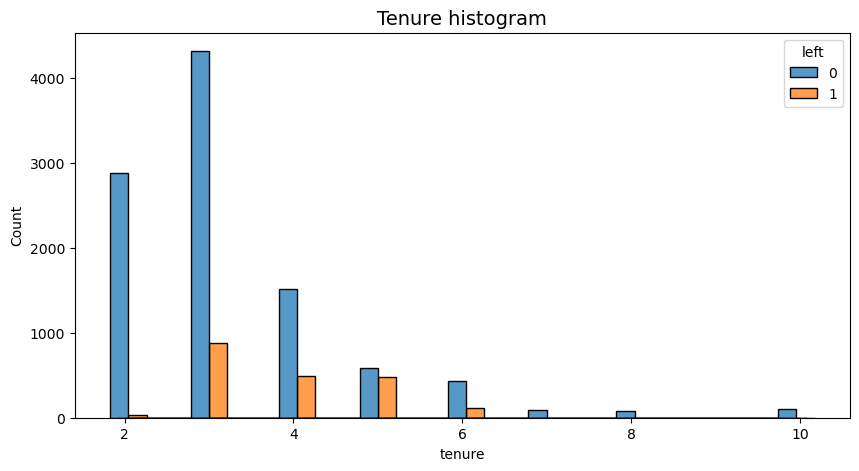

In [189]:
plt.figure(figsize = (10,5))
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5).set_title('Tenure histogram', fontsize='14')

plt.show();

### Overworked 
This is a new Feature we created from the `average_monthly_hours`

A 40 hours per week work for 1 year will = 50weeks * 40Hrs/ 12months. this will yield 166.67 hrs/month. for our model creation, to ensure we curb data leak, we assumed that every Employee who works above 175hrs/month is being overworked

Analysis showed from the visualization below that every Employee irrespective of being Promoted in the Last 5 Years or not  whose `average_monthly_hours` where above 280 hrs/month All **Left** the Company

Being overworked can take a toll on an employee’s well-being. It’s essential to find a balance between work and personal life i therefore suggest the following
1. **Communication**:  Encourage open communication with the employee. Discuss their workload, deadlines, and any challenges they might be facing. Ensure they feel comfortable expressing their concerns.
2. **Prioritization**: Help the employee prioritize tasks. Identify critical tasks and consider delegating or rescheduling less urgent ones. Sometimes, it’s about quality over quantity.
3. **Breaks and Rest**: Remind the employee to take regular breaks during the workday. Short breaks can improve focus and productivity. Encourage them to disconnect after work hours.
4. **Support**: Offer emotional support and empathy. Acknowledge their efforts and recognize their hard work. Sometimes, a simple “thank you” goes a long way.
5. **Workload Assessment**: Evaluate whether the workload is genuinely excessive. If necessary, consider redistributing tasks or hiring additional help.
Remember that employee well-being directly impacts productivity and overall team morale. Prioritizing their health and happiness benefits everyone in the long run

Text(0.5, 1.0, 'Monthly hours by promotion_last_5years')

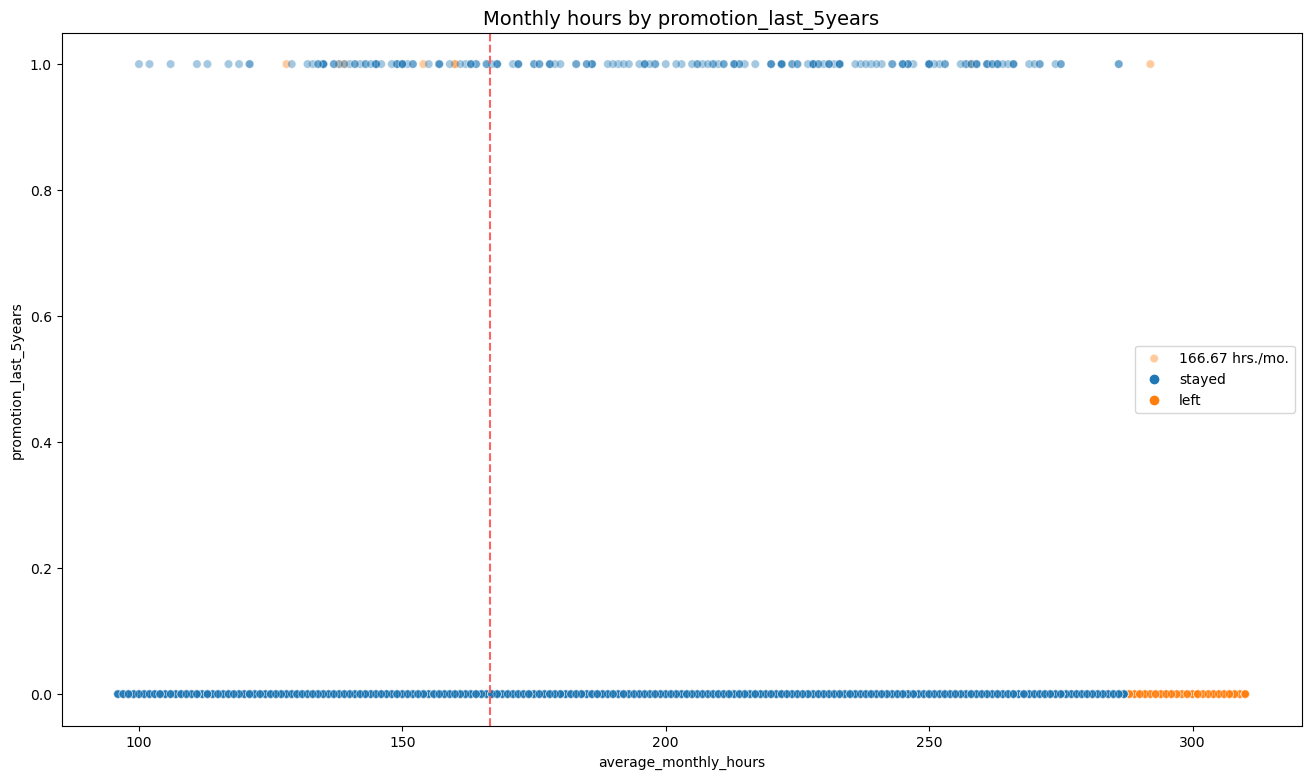

In [206]:
# Create a plot as needed
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361',  ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'stayed', 'left'])
plt.title('Monthly hours by promotion_last_5years', fontsize='14')

In [203]:
df2['left'].head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64